# Audi Arabaların Fiyat Tahmini

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [61]:
veri=pd.read_csv("Cars/audi.csv")
df=veri.copy()
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [62]:
df.isnull().sum() # missing value muz yok.

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [63]:
df.rename(columns={"model":"Model","year":"Yılı","price":"Fiyatı","transmission":"VitesTürü","mileage":"Mil",
           "fuelType":"YakıtTipi","tax":"Vergi","mpg":"YakıtTüketimi","engineSize":"MotorHacmi"},inplace=True)
df.head()

,Model,Yılı,Fiyatı,VitesTürü,Mil,YakıtTipi,Vergi,YakıtTüketimi,MotorHacmi
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Yılı,10668.0,2017.100675,2.167494,1997.0,2016.00,2017.0,2019.0,2020.0
Fiyatı,10668.0,22896.685039,11714.841888,1490.0,15130.75,20200.0,27990.0,145000.0
Mil,10668.0,24827.244001,23505.257205,1.0,5968.75,19000.0,36464.5,323000.0
Vergi,10668.0,126.011436,67.170294,0.0,125.00,145.0,145.0,580.0
YakıtTüketimi,10668.0,50.770022,12.949782,18.9,40.90,49.6,58.9,188.3
MotorHacmi,10668.0,1.930709,0.602957,0.0,1.50,2.0,2.0,6.3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          10668 non-null  object 
 1   Yılı           10668 non-null  int64  
 2   Fiyatı         10668 non-null  int64  
 3   VitesTürü      10668 non-null  object 
 4   Mil            10668 non-null  int64  
 5   YakıtTipi      10668 non-null  object 
 6   Vergi          10668 non-null  int64  
 7   YakıtTüketimi  10668 non-null  float64
 8   MotorHacmi     10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [66]:
df.groupby("Model").mean()["Fiyatı"]

Model
 A1     14327.750557
 A2      2490.000000
 A3     17408.522032
 A4     20255.450398
 A5     23577.114512
 A6     22695.385027
 A7     28865.516393
 A8     34981.847458
 Q2     22516.975669
 Q3     22999.261821
 Q5     30445.688712
 Q7     44788.319899
 Q8     60115.014493
 R8     97652.214286
 RS3    34050.515152
 RS4    50151.612903
 RS5    51265.206897
 RS6    55963.871795
 RS7    33490.000000
 S3     20379.444444
 S4     31248.083333
 S5     15980.000000
 S8     33807.750000
 SQ5    31415.812500
 SQ7    49269.000000
 TT     21784.452381
Name: Fiyatı, dtype: float64

In [67]:
df.drop(["YakıtTipi","Model","VitesTürü"],axis=1,inplace=True)
df.head()

,Yılı,Fiyatı,Mil,Vergi,YakıtTüketimi,MotorHacmi
0,2017,12500,15735,150,55.4,1.4
1,2016,16500,36203,20,64.2,2.0
2,2016,11000,29946,30,55.4,1.4
3,2017,16800,25952,145,67.3,2.0
4,2019,17300,1998,145,49.6,1.0


# Keşifçi Veri Analizi (EDA)

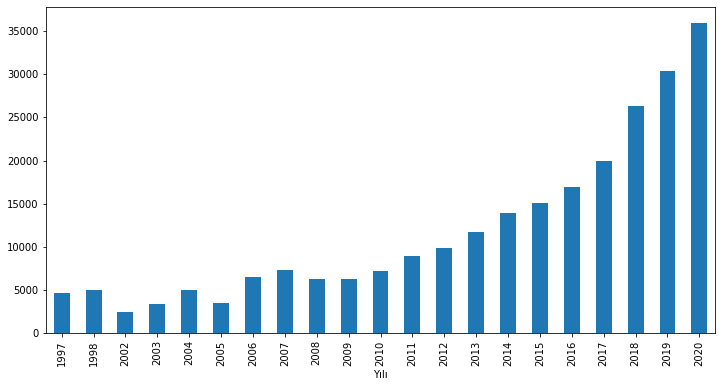

In [68]:
df.groupby("Yılı").mean()["Fiyatı"].plot(kind="bar",figsize=(12,6));

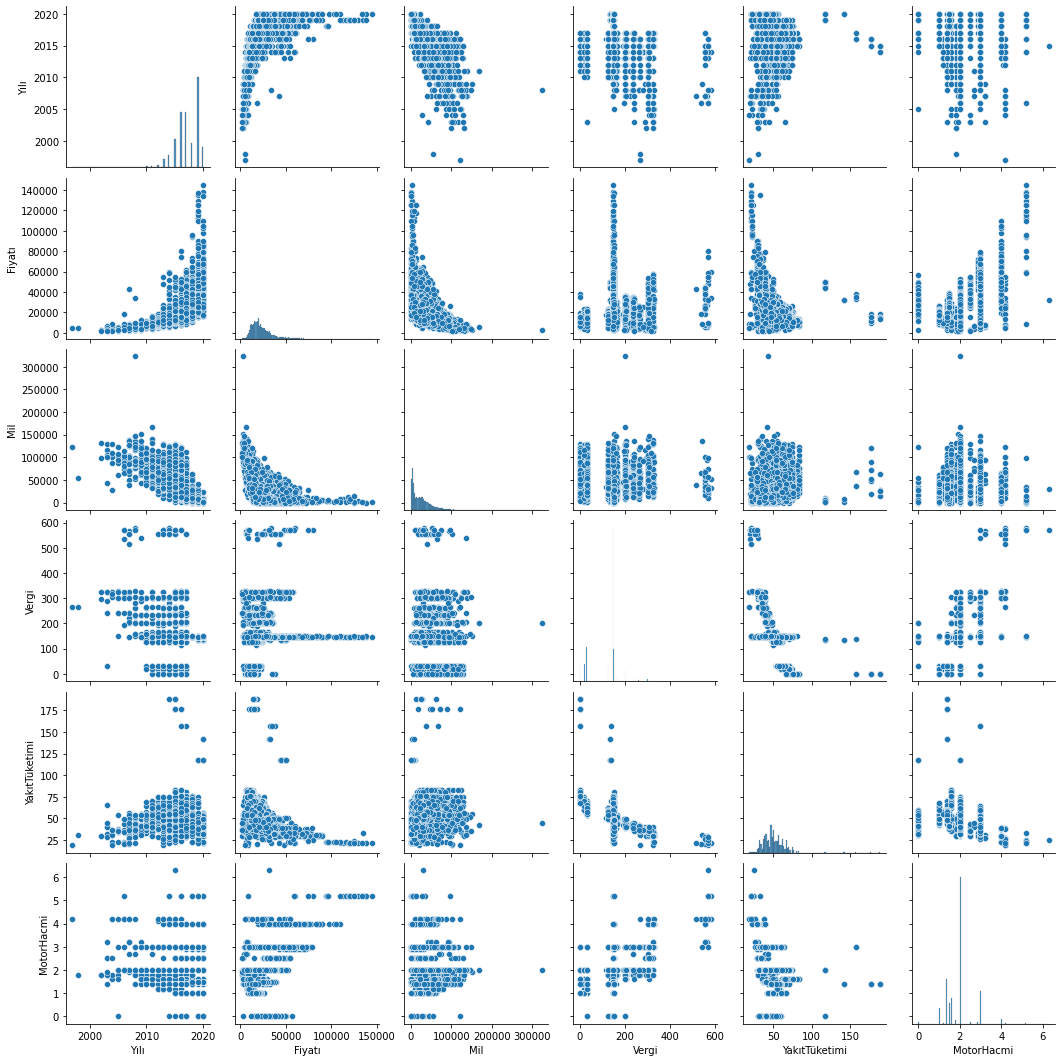

In [71]:
sns.pairplot(df)

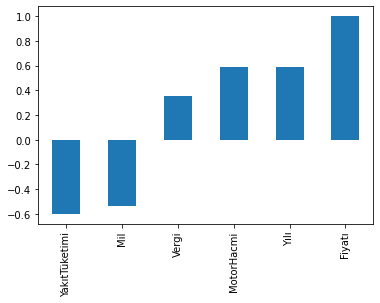

In [74]:
df.corr()["Fiyatı"].sort_values().plot(kind="bar");

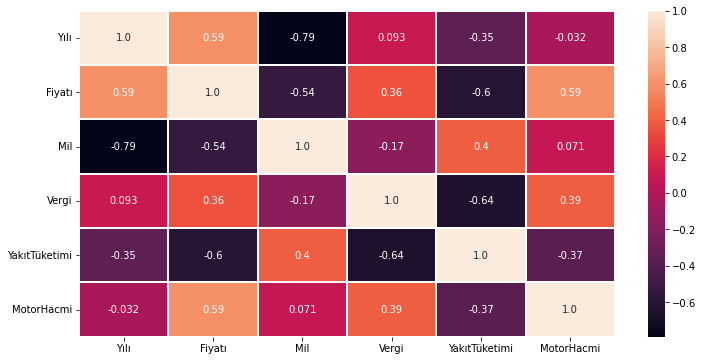

In [75]:
plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,fmt="0.2",linewidths=0.1);

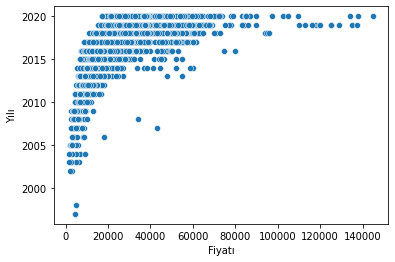

In [76]:
sns.scatterplot(x=df.Fiyatı,y=df.Yılı);

In [78]:
df.sort_values("Fiyatı",ascending=False)[0:10]

,Yılı,Fiyatı,Mil,Vergi,YakıtTüketimi,MotorHacmi
4783,2020,145000,2000,145,21.1,5.2
2255,2020,137995,70,145,21.1,5.2
4179,2019,137500,10,150,21.4,5.2
3367,2019,135000,1000,145,32.8,5.2
5459,2020,133900,333,145,21.4,5.2
1646,2019,129000,4000,145,21.4,5.2
10468,2019,125000,13663,150,21.4,5.2
4925,2019,125000,500,145,21.4,5.2
3359,2019,125000,100,145,24.1,5.2
7445,2019,119995,7800,145,21.4,5.2


In [140]:
X=df.drop("Fiyatı",axis=1).values
y=df["Fiyatı"].values

In [141]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (7467, 5)
X_test:  (3201, 5)
y_train:  (7467,)
y_test:  (3201,)


In [142]:
scaler=MinMaxScaler()

In [143]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [144]:
model=Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))


model.add(Dense(1))

model.compile(loss="mse",optimizer="adam")

In [145]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=350,batch_size=200,verbose=1)

Epoch 1/350
38/38 [==============================] - 0s 4ms/step - loss: 660291200.0000 - val_loss: 664259008.0000
Epoch 2/350
38/38 [==============================] - 0s 2ms/step - loss: 660289344.0000 - val_loss: 664257280.0000
Epoch 3/350
38/38 [==============================] - 0s 2ms/step - loss: 660287680.0000 - val_loss: 664255488.0000
Epoch 4/350
38/38 [==============================] - 0s 2ms/step - loss: 660285888.0000 - val_loss: 664253632.0000
Epoch 5/350
38/38 [==============================] - 0s 2ms/step - loss: 660283520.0000 - val_loss: 664250496.0000
Epoch 6/350
38/38 [==============================] - 0s 1ms/step - loss: 660278400.0000 - val_loss: 664239936.0000
Epoch 7/350
38/38 [==============================] - 0s 2ms/step - loss: 660254912.0000 - val_loss: 664195392.0000
Epoch 8/350
38/38 [==============================] - 0s 2ms/step - loss: 660173120.0000 - val_loss: 664047232.0000
Epoch 9/350
38/38 [==============================] - 0s 1ms/step - loss: 6599092

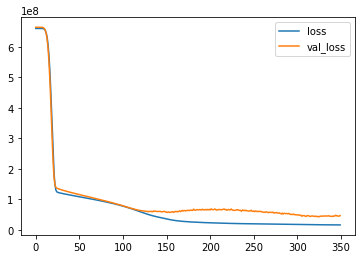

In [146]:
kayıpVeri=pd.DataFrame(model.history.history)
kayıpVeri.plot();

In [147]:
y_pred=model.predict(X_test)

In [148]:
mean_absolute_error(y_test,y_pred)

4857.165040504482

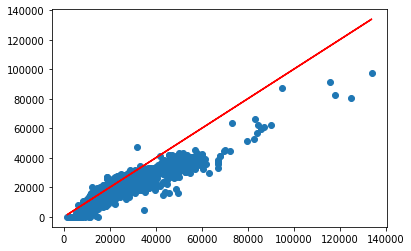

In [149]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color="r");